In [209]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [211]:
#load data

data = pd.read_csv('/Users/niyasop/Desktop/ml-packagess/land_price.csv')

In [212]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [213]:
data.shape

(1460, 81)

In [214]:
data.dtypes.nunique() #check how many types of data types 

3

In [215]:
data.dtypes.unique() #to print different types of data types

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [216]:
data.isna().sum().sum() #for checking missisng values 

6965

In [217]:
data_cols=data.columns.tolist() #moving columns to  a list

In [218]:
data_cols

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [219]:
#keeping a backup
databackup = data.copy()

In [220]:
#split the dataframe into 3 based on the datatype

In [221]:
int_df = data.select_dtypes(include=['int64'])
int_df.shape

(1460, 35)

In [222]:
float_df=data.select_dtypes(include=['float64'])
float_df.shape

(1460, 3)

In [223]:
obj_df=data.select_dtypes(include=['object'])
obj_df.shape

(1460, 43)

In [224]:
#move these  into list

In [225]:
obj_df.columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [226]:
int_df.columns.tolist()

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [227]:
float_df.columns.tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [228]:
# missing value - for all categories
# outlier value - only for int64 and float64
# one-hot encoding  - only for objects

#combine back int_cols,float_cols,obj_cols to data

#Check for corelation and feature elimination (correlation < |0.1|  can be eliminated)

In [229]:
obj_df.isna().sum()[obj_df.isna().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [230]:
obj_df.shape

(1460, 43)

In [231]:
int_df_missing=int_df.isna().sum()[int_df.isna().sum()>0]
int_df_missing

Series([], dtype: int64)

In [232]:
float_df_missing=float_df.isna().sum()[float_df.isna().sum()>0]
float_df_missing

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [233]:
#since a few columns have more than 40% missing values, such columns has to be removed.

In [234]:
obj_df_missing_0_500= obj_df.isna().sum()[(obj_df.isna().sum()>0) & (obj_df.isna().sum()<500)] 


In [235]:
obj_df_missing_0_500

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [236]:
obj_df_missing_500=obj_df.isna().sum()[(obj_df.isna().sum()>500)]
obj_df_missing_500

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [237]:
#There are missing values in 3 float columns and 16 cat columns

In [238]:
#Missing value handling

In [239]:
#1. float value

In [240]:
missing_cols = float_df_missing.index.tolist()
missing_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [241]:
#filling missing values in Float cols
for col in missing_cols:
    replace_value = float_df[col].mean()
    float_df[col] = float_df[col].fillna(replace_value)

In [242]:
#verification of float columns
float_df.isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [243]:
#missing values in categorcal values

In [244]:
obj_df_missing_500_cols = obj_df_missing_500.index.tolist()

In [245]:
obj_df.drop(obj_df_missing_500_cols,axis=1,inplace=True) #we deleted the columns having missing values above 500

In [246]:
obj_df_missing_0_500_cols = obj_df_missing_0_500.index.tolist()

In [247]:
obj_df_missing_0_500_cols

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [248]:
for col in obj_df_missing_0_500_cols:
    replace_value = obj_df[col].mode()[0]
    obj_df[col] = obj_df[col].fillna(replace_value)   

In [249]:
obj_df.isna().sum().sum()

0

In [250]:
#Outlier Verification

In [251]:
#we use zscore method for handling outliers 

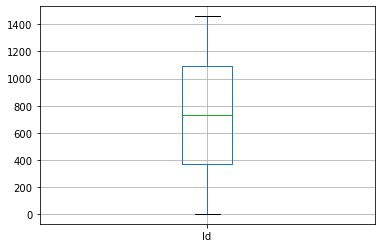

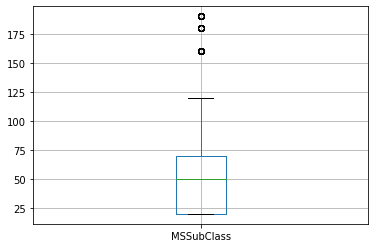

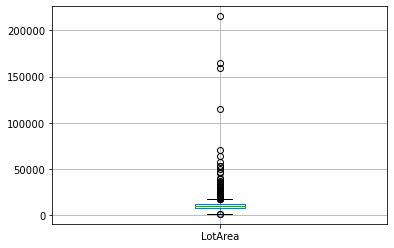

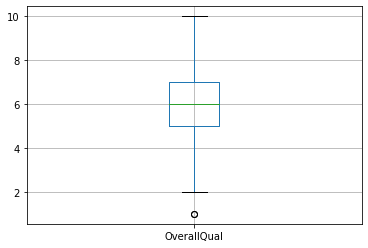

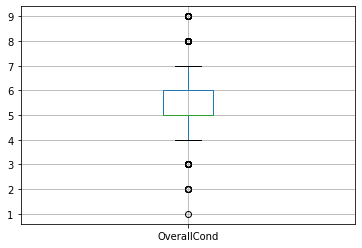

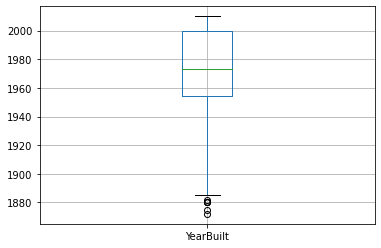

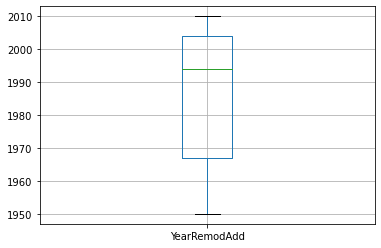

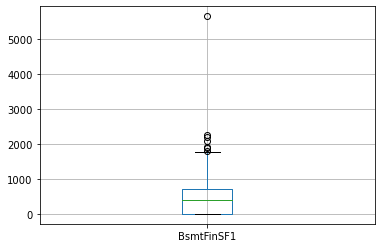

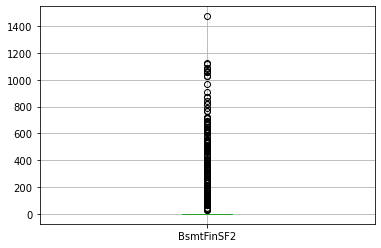

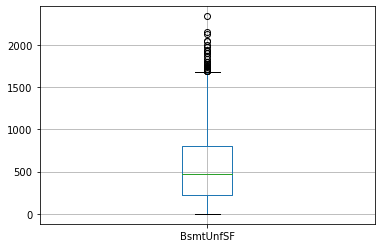

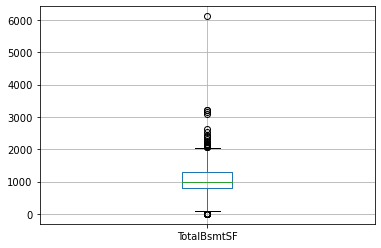

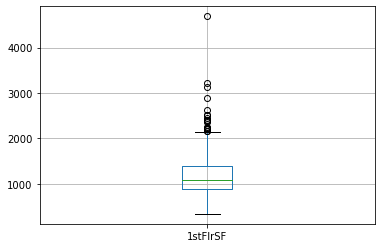

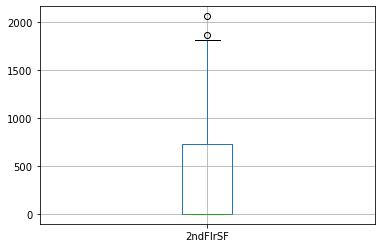

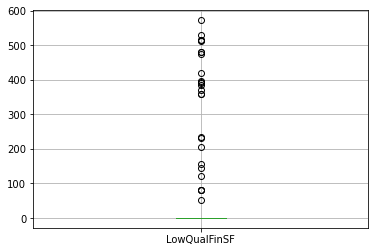

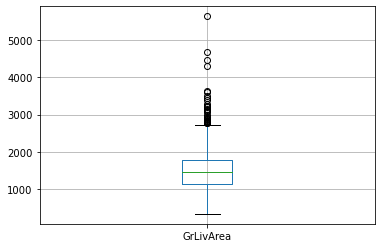

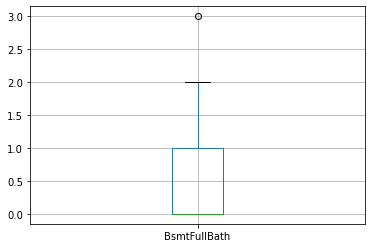

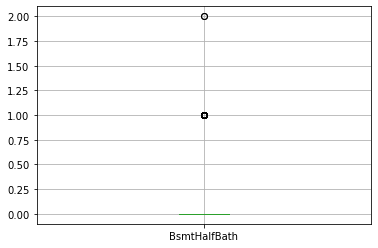

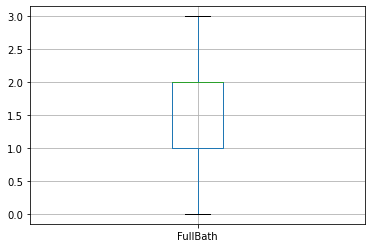

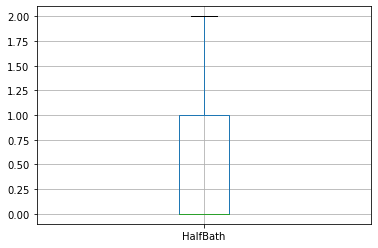

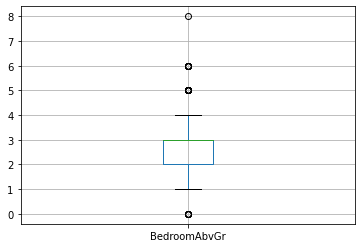

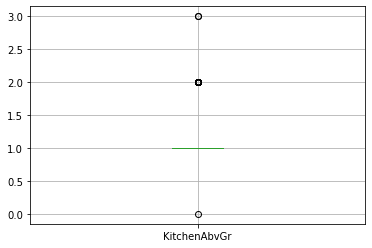

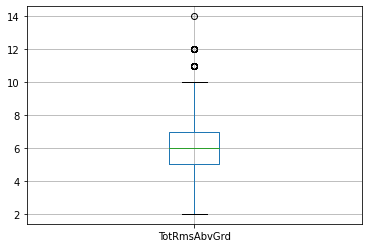

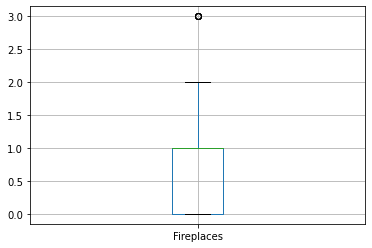

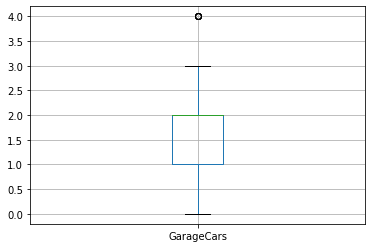

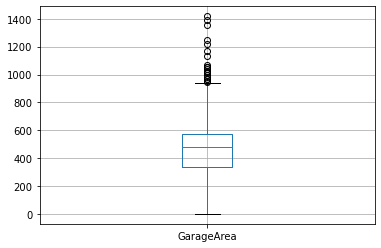

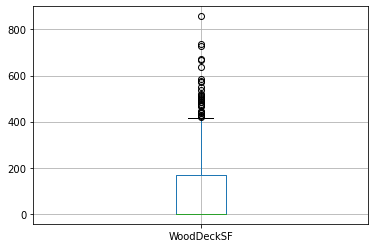

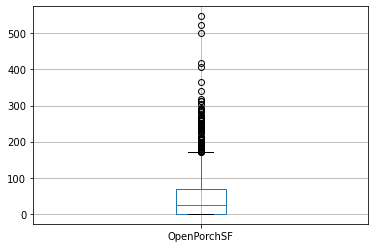

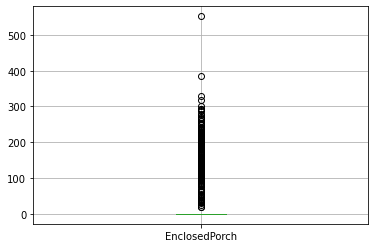

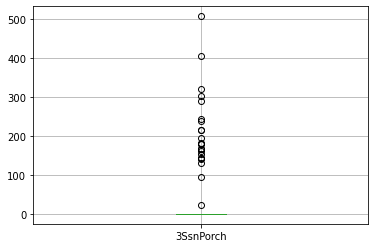

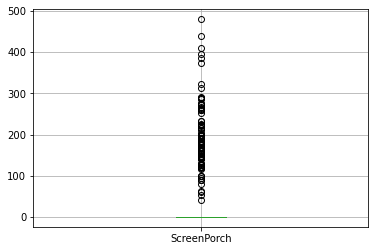

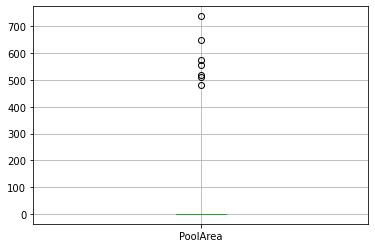

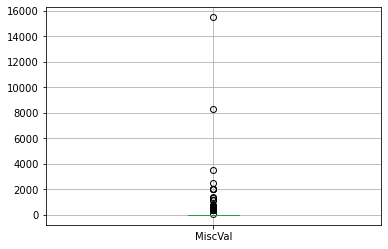

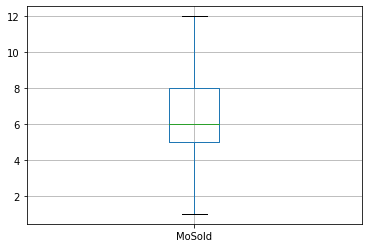

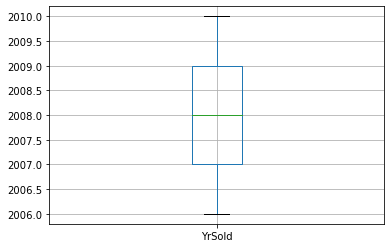

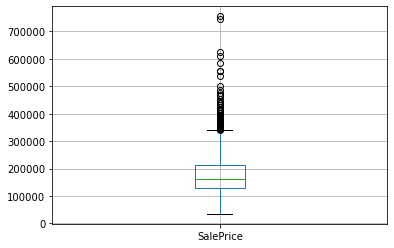

In [252]:
for x in int_df.columns:
    plt.figure()
    int_df.boxplot([x])



In [270]:
col = 'SalePrice'
int_df[col].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [282]:
int_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,zscore
0,1,60,8450,7,5,2003,2003,706,0,150,...,61,0,0,0,0,0,2,2008,0.347154,0.347154
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,0,5,2007,0.007286,0.007286
2,3,60,11250,7,5,2001,2002,486,0,434,...,42,0,0,0,0,0,9,2008,0.535970,0.535970
3,4,70,9550,7,5,1915,1970,216,0,540,...,35,272,0,0,0,0,2,2006,-0.515105,-0.515105
4,5,60,14260,8,5,2000,2000,655,0,490,...,84,0,0,0,0,0,12,2008,0.869545,0.869545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,40,0,0,0,0,0,8,2007,-0.074534,-0.074534
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,0,0,2,2010,0.366036,0.366036
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,60,0,0,0,0,2500,5,2010,1.077242,1.077242
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,112,0,0,0,0,4,2010,-0.488356,-0.488356
